<a href="https://colab.research.google.com/github/Manshi-shreya/MNIST_KNN/blob/main/MNIST_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enable kaggle connection to colab for data transfer

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manshishrey","key":"c42dcecfa59d2ca3dc9f1a0cd9070a09"}'}

so kaggle is connected to colab
now upload the file

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

it moved json files to colab now simply dwnld the data
hum phle api create kiye from kaggle and us file ko upload kiye upar

In [ ]:
#will give all the dataset availabel in kaggle, it helps in migrating the data from kaggle to colab because dwnloading and uploading ,might take a alot of time and space
#! kaggle datasets list
! kaggle datasets download -d oddrationale/mnist-in-csv

 33% 5.00M/15.2M [00:00<00:00, 28.7MB/s]
100% 15.2M/15.2M [00:00<00:00, 65.0MB/s]


foe searching simply write the name of the data, go to kaggle the data u want to dwld , copy the api command with list put ! mark in the beg

In [ ]:
#in sec it copies the data , now unzip it by giving path
!unzip /content/mnist-in-csv.zip

Archive:  /content/mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


start
mnist is a image data where digits are written there matrix- 28*28=no of pixel
and pixel val range from 0-255(black-white)

In [ ]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm  #tells number kon sa loop chl rha h avi

In [ ]:
df=pd.read_csv("/content/mnist_train.csv") #trainset
#pixels are flattened and stored as 1d arr

In [ ]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
28*28


784

In [ ]:
df.shape #1 xtra is our target =label, usko remove krna h to 784 ho jaega
#it shows thst first val is 5 and rest all col are pixel vals
#showing that col=60k , it has 60k images

(60000, 785)

In [ ]:
#divide the model into train and test
X_train=df.iloc[:,1:].values #features
y_train=df.iloc[:,0].values #only 0th col hona chaiye
#jo target wala col htaye the jisme number tha , whi y me pass hoga , y me hmeah target pass hota h
X_train.shape,y_train.shape

((60000, 784), (60000,))

In [ ]:
#create a funcn pass col-arr of pixel so reshape it
def image_plot(x):
  x=x.reshape((28,28))
  plt.imshow(x,cmap="gray") # photo hame gray color ka chaiye

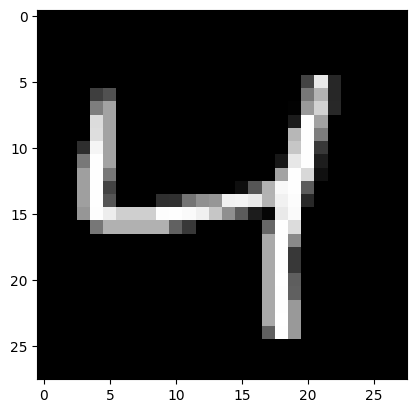

In [ ]:
test=df.values
# image_plot(test[4][1:]) #4 ke badle koi v row no pass karo jaise 0 ke liye 5 show krega
#and col ke liye hum 1 se pass krenge ,target wala passs nhi krenge
image_plot(X_train[2]) #print for all by changing 0

In [ ]:
#apply knn algo and compute
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X_train, y_train, test_size=0.2)
X_train.shape,y_train.shape,X_test.shape, y_test.shape

((48000, 784), (48000,), (12000, 784), (12000,))

In [ ]:
def distance(x1,x2):
  return np.sqrt(sum((x1-x2)**2))

In [ ]:
# knn function
def knn(X,Y,testing_point,k=7):
  vals=[]
  m=X.shape[0]
  for i in range(m):
    dist= distance(X[i],testing_point)
    vals.append([dist,Y[i]])

  vals=sorted(vals)
  vals=vals[:k]
  vals=np.array(vals)
  new_val=np.unique(vals [:,1],return_counts=True)
  index=new_val[1].argmax()
  predicting=new_val[0][index]
  return predicting




In [ ]:
pred=[]
for i in tqdm(range(20)): #x_test_shape hota 20 ke jagaah #kon sa wala img process hua avi tk ye v btayega
  pred.append(knn(X_train,y_train,X_test[i]))

100%|██████████| 20/20 [01:28<00:00,  4.42s/it]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=7, n_jobs=-1) #utilise each cpu
clf.fit(X_train,y_train)



KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [ ]:
KNeighborsClassifier(algorithm='auto',leaf_size=30, metric='minkowski' ,metric_params=None, n_jobs=-1,n_neighbors=7,p=2,weights='uniform')

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [ ]:
pred2= clf.predict(X_test[:20])

In [ ]:
pred


[6.0,
 6.0,
 3.0,
 3.0,
 1.0,
 7.0,
 4.0,
 6.0,
 5.0,
 0.0,
 3.0,
 7.0,
 6.0,
 0.0,
 5.0,
 7.0,
 9.0,
 1.0,
 0.0,
 4.0]

In [ ]:
pred2

array([6, 6, 3, 3, 1, 7, 4, 6, 5, 0, 3, 7, 6, 0, 5, 7, 9, 1, 0, 4])

In [ ]:
#check both are equal or not ,use .sum to check total no
pred==pred2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
#pred2 is from sklearn funcn, and compare it with our pred or ytest i.e. from knn funcn
y_test[:20]==pred2


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
(y_test[:20]==pred2).sum()/20

1.0

In [ ]:
pred=clf.predict(X_test)  #yha se v score nikal skte h

confusion matrix to evaluate the accuracy of the algo- true +ve and true -ve

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test[:20],pred2) #,labels=["0","1","2","3","4","5","6","7","8","9"])
#diagonal shows the correct prediction, rest all khi v0 ke badle 1 h to it is incorrect prediction
# u can also ask 50 pred 20-50 yha ar pred2 me arr ki val 50 karo


array([[3, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
clf.score(X_test[:50],y_test[:50]) #it is in built funcn


0.94

Now learn Kmeans algo-unsupervised algo,we do clusters and grouping , don tgive labels,at starting it will take any 2 random centres, then draw a perpendicular line in between, which is equidistant from both the centres
in each iteran cal dis of all pts from centre and will move centre in the middle of the cluster,after moving again dram perpendicualr line